# 특성 공학과 규제

### 다중 회귀
여러 개의 특성을 사용한 선형 회귀를 다중 회귀(multiple regresssion)라고 부른다.
### 특성공학
기존의 특성을 이용하여 새로운 특성을 만드는 것을 특성 공학이라고 한다


In [2]:
#다중 회귀
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #SSL 증명 해결

import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 변환기
특성을 만들거나 전처리하기 위한 클래스 

LinearRegression 같은 사이킷런의 모델 클래스는 추정기(estimator)라고 부른다.

In [6]:
#변환기 클래스를 이용하여 데이터
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


위 값에서 1이 포함되는 이유는 선형 방정식의 절편이 항상 값이 1인 특성과 곱해지는 계수이기 때문이다.

사이킷런의 선형 모델은 자동으로 절편을 추가하므로 include_bias=False로 지정하여 다시 특성을 변환

In [7]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [8]:
# train 데이터셋과 test 데이터셋을 적용시키기
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


9개의 특성이 만들어진 것을 확인할 수 있다.

In [9]:
#각각의 특성이 어떤 입력의 조합으로 만들어졌는지 확인 할 수 있다.
poly.get_feature_names()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [10]:
test_poly = poly.transform(test_input)

In [13]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594168


In [22]:
# 특성 추가하여 데이터 만들기
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [23]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

PolynomialFeatures의 하이퍼 파라미터

PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')

interaction_only=True일 경우 각 특성끼리의 상호계산만 적용되어 특성이 늘어난다. 

예를 들어, 기본 특성이 x0, x1, x2일 경우 새로운 특성들은 x0, x1, x2, x0 * x1, x0 * x2, x1 * x2, x0 * x1 * x2 이다.

In [24]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999989608
-144.4049046409093


위 평가 지표에서 훈련 데이터의 값은 높은 값을 나타내고 테스트 데이터에 대해서는 음수 값을 나타낸다.

이는 과대적합이 일어났다는 것을 확인할 수 있다.

## 규제
규제는 머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 훼방하는 것을 의미한다. 즉 모델이 훈련 세트에 과대적합되지 않도록 만든다.

### 릿지 회귀(Ridge Regression, L2 Regression)
Ridge Regression은 가중치를 제곱한 값을 기준으로 규제를 적용한다.

<img width="300" alt="image" src="https://github.com/jongyunwoo/machinelearning-deeplearning/assets/127372349/2021c2f5-1018-4452-a878-64be886f3f5d"><br/>
<img width="300" alt="image" src="https://github.com/jongyunwoo/machinelearning-deeplearning/assets/127372349/c96069b3-87bf-4458-8d0f-2cdaa1b5bc98">


### 라쏘 회귀(Lasso Regression, L1 Regresssion)
Lasso Regression은 가중치의 절댓값을 기준으로 규제를 적용한다.

Redge, Lasso 모두 가중치의 크기를 줄이지만 Lasso는 아예 0으로 만들 수 있다.

<img width="300" alt="image" src="https://github.com/jongyunwoo/machinelearning-deeplearning/assets/127372349/066ad9c5-62b1-4c19-b972-fdffdbee5e70"><br/>
<img width="300" alt="image" src="https://github.com/jongyunwoo/machinelearning-deeplearning/assets/127372349/98b6880c-80d5-4342-97ce-0b5c32a32833">

일반적으로는 Ridge Regression을 좀 더 선호한다.

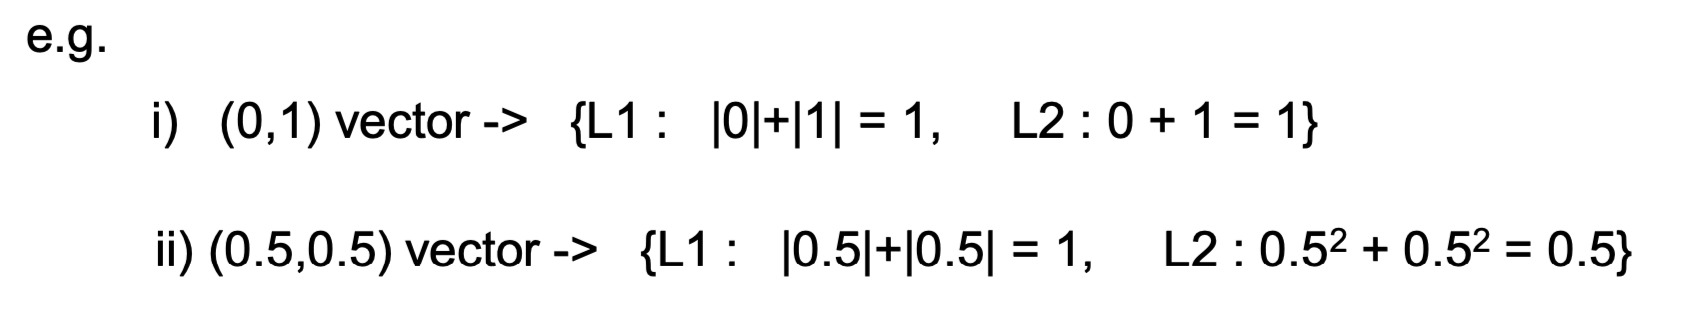

위 사진을 보면 L2 Regression이 좀 더 효과적으로 가중치를 줄일 수 있다.

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615388


릿지와 라쏘 모델은 alpha값을 이용하여 규제의 강도를 조절 할 수 있다.

alpha 값이 크면 규제 강도가 세지므로 계수 값을 줄이고 조금 더 과소적합되도록 유도한다.

alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 커진다.

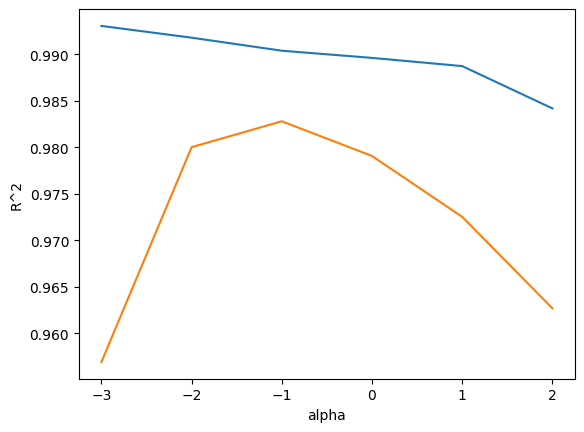

In [30]:
# 그래프를 통해 적절한 alpha값 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

# alpha값을 0.001부터 10배씩 늘렸기 때문에 그래프를 보기 쉽게 하기 위해 log스케일로 변경
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()


In [31]:
#최종으로 alpha = 0.1값으로 훈련하기
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9903815817570366
0.9827976465386955


## Lasso Regression

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


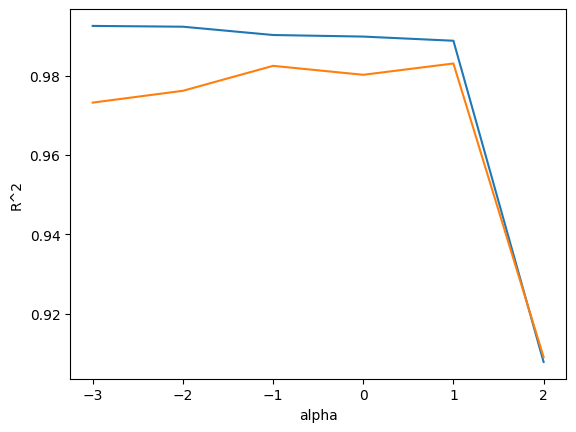

In [35]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [36]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [39]:
# 가중치가 0인 특성이 몇 개인지 확인하기
print(lasso.coef_ == 0)
print(np.sum(lasso.coef_ == 0))

[ True  True  True False False False  True  True False  True False False
 False False False  True  True False False  True  True  True  True  True
  True False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True False  True  True  True  True  True]
40
